# Dilution Series and Data Aggregation
## Phil Wilmarth
### OHSU PSR Core
### February, 2018

<br>

# 1. Compare PSM, peptide, and protein data scatter
This is a complex mouse brain mixture, digested, split into 6 aliquots, labeled with 6 TMT reagents, and mixed in a series of dilutions. The relative volume amounts were in these proportions:  25 : 20 : 15 : 10 : 5 : 2.5. The biological sample was from the Gail Mandel lab at OHSU.

The data were generated on a Thermo Fusion using the SPS MS3 method (McAlister 2014). The peptide identifications and reporter ion intensities were generated using an in-house pipeline with Comet (Eng 2013) as the search engine. The PAW pipeline (Wilmarth 2009) does a direct processing of the RAW files to extract MS2 scans for Comet and the reporter ions from the corresponding MS3 scans (Chambers 2012). Comet results are filtered using a target/decoy strategy with accurate mass conditional score histograms. Basic parsimony logic is used to generate protein and peptide reports.

An additional protein grouping algorithm is also employed to group protein families having large fractions of identical common peptides. The final list of proteins is used as the context for shared and unique peptide determinations. Only unique peptides in that context are used in the TMT quantification. All unique PSM reporter ions are summed into protein intensity totals for each channel. We will compare some properties of the reporter ions at the PSM level, the peptide level (combined copies and charge states), and the protein level.

> Chambers, M.C., Maclean, B., Burke, R., Amodei, D., Ruderman, D.L., Neumann, S., Gatto, L., Fischer, B., Pratt, B., Egertson, J. and Hoff, K., 2012. A cross-platform toolkit for mass spectrometry and proteomics. Nature biotechnology, 30(10), p.918.

>Eng, J.K., Jahan, T.A. and Hoopmann, M.R., 2013. Comet: an open‐source MS/MS sequence database search tool. Proteomics, 13(1), pp.22-24.

> McAlister, G.C., Nusinow, D.P., Jedrychowski, M.P., Wühr, M., Huttlin, E.L., Erickson, B.K., Rad, R., Haas, W. and Gygi, S.P., 2014. MultiNotch MS3 enables accurate, sensitive, and multiplexed detection of differential expression across cancer cell line proteomes. Analytical chemistry, 86(14), pp.7150-7158.

> Wilmarth, P.A., Riviere, M.A. and David, L.L., 2009. Techniques for accurate protein identification in shotgun proteomic studies of human, mouse, bovine, and chicken lenses. Journal of ocular biology, diseases, and informatics, 2(4), pp.223-234.

> The protein grouping algorithm is described here:
https://digitalcommons.ohsu.edu/etd/3855/
 
There are CSV files extracted from the normal PAW report files for proteins and peptides. For this analysis, we do not need to know the identities of any of the proteins or peptides. Only the columns of the reporter ion intensities (for all 10 reporter ion channels) were extracted for the CSV files. The PSM data comes from the reporter ion table for each MS3 scan extracted directly from the converted RAW file. This is unfiltered data. This is **not** a list of PSMs associated with the identified peptides and proteins.  

We will drop the 4 unused channels after loading the data. First, load libraries and read in the CSV files, extract the 6 columns, and see what the data in each column looks like.

In [62]:
# comparing peptide intensities to protein intensities
# load libraries
library(tidyverse)
library(limma)

# Set up to select the proper columns and label them
keep <- c(1, 2, 5, 6, 9, 10)
labels = c("a_25", "b_20", "c_15", "d_10", "e_5", "f_2.5")

# read in the three datasets, keep the 6 columns, and set labels
# PSMs
psm_start <- read_csv("psm_tmt.csv")
psm_start <- psm_start[keep]
colnames(psm_start) <- labels
# PAW Grouped peptides
peptide_start <- read_csv("grouped_peptide_summary_TMT_8.csv")
peptide_start <- peptide_start[keep]
colnames(peptide_start) <- labels
# PAW grouped proteins
protein_start <- read_csv("grouped_protein_summary_TMT_8.csv")
protein_start <- protein_start[keep]
colnames(protein_start) <- labels

# filter out rows with any missing data points and see how many rows remain
# this should cull out some low quality PSMs
psms <- psm_start[apply(psm_start, 1, function(x) all(x > 0)), ] 
print("PSMs (before and after):")
dim(psm_start)[1]; dim(psms)[1]
peptides <- peptide_start[apply(peptide_start, 1, function(x) all(x > 0)), ] 
print("Peptides (before and after):")
dim(peptide_start)[1]; dim(peptides)[1]
proteins <- protein_start[apply(protein_start, 1, function(x) all(x > 0)), ] 
print("Proteins (before and after):")
dim(protein_start)[1]; dim(proteins)[1]

# check column sums
format(round(colSums(psms), digits = 0), big.mark = ",")
format(round(colSums(peptides), digits = 0), big.mark = ",")
format(round(colSums(proteins), digits = 0), big.mark = ",")

Parsed with column specification:
cols(
  height_126 = col_double(),
  height_127_N = col_double(),
  height_127_C = col_double(),
  height_128_N = col_double(),
  height_128_C = col_double(),
  height_129_N = col_double(),
  height_129_C = col_double(),
  height_130_N = col_double(),
  height_130_C = col_double(),
  height_131 = col_double()
)
Parsed with column specification:
cols(
  TotInt_126C_MAN1353 = col_double(),
  TotInt_127N_MAN1353 = col_double(),
  TotInt_127C_MAN1353 = col_double(),
  TotInt_128N_MAN1353 = col_double(),
  TotInt_128C_MAN1353 = col_double(),
  TotInt_129N_MAN1353 = col_double(),
  TotInt_129C_MAN1353 = col_double(),
  TotInt_130N_MAN1353 = col_double(),
  TotInt_130C_MAN1353 = col_double(),
  TotInt_131N_MAN1353 = col_double()
)
Parsed with column specification:
cols(
  TotInt_126C_MAN1353 = col_double(),
  TotInt_127N_MAN1353 = col_double(),
  TotInt_127C_MAN1353 = col_double(),
  TotInt_128N_MAN1353 = col_double(),
  TotInt_128C_MAN1353 = col_double(),
  

[1] "PSMs (before and after):"


[1] 216103

[1] 59698

[1] "Peptides (before and after):"


[1] 28799

[1] 20632

[1] "Proteins (before and after):"


[1] 2781

[1] 2689

a_25            b_20            c_15            d_10             e_5 
"3,827,241,213" "3,088,914,690" "2,363,152,704" "1,665,392,787" "  778,998,204" 
          f_2.5 
"  434,946,648"

a_25            b_20            c_15            d_10             e_5 
"1,989,609,572" "1,555,232,467" "1,202,832,977" "  831,759,502" "  400,962,779" 
          f_2.5 
"  222,664,615"

a_25            b_20            c_15            d_10             e_5 
"2,006,316,227" "1,570,213,930" "1,213,599,512" "  839,401,807" "  402,884,998" 
          f_2.5 
"  222,698,996"

## We can look at the intensity distributions of each channel
Look at the distributions for the PSM-level data first. The x-axis is the log, base 2, of the intensities.

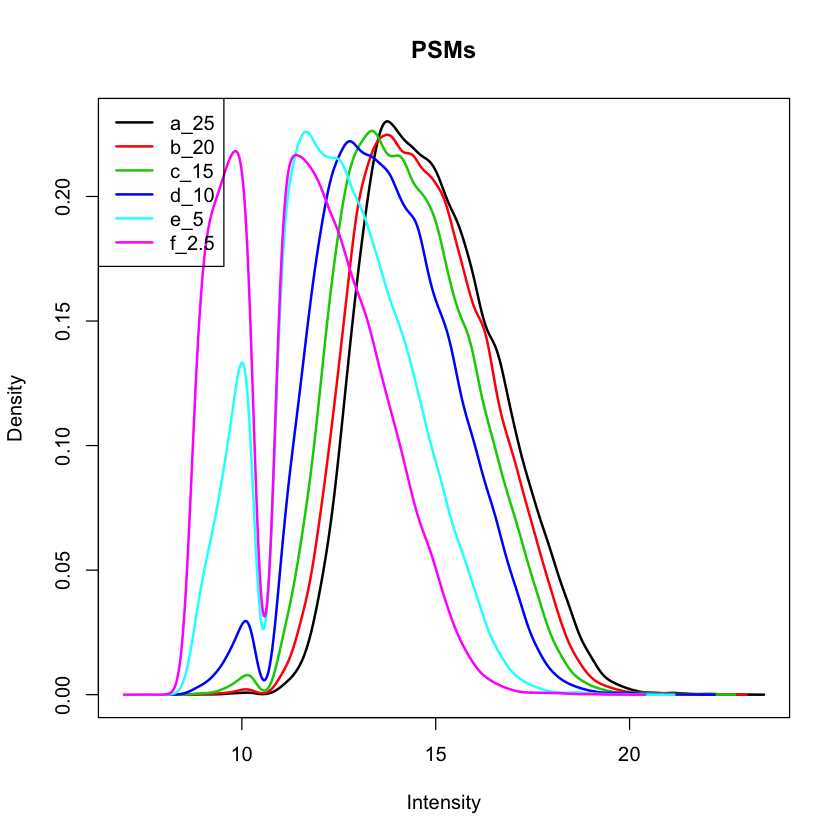

In [63]:
# compare some intensity (peak heights) distributions
plotDensities(log2(psms), main = "PSMs")

## There is a pronounced lower-intensity "notch"
There is a low intensity (at a log2 intensity of 11 or so) drop out ("notch") in the PSM reporter ions. It has more of an effect on the 5 and 2.5 dilutions where the intensities are smaller. 

This "notch" has been reported previously:

> Hughes, C.S., Zhu, C., Spicer, V., Krokhin, O.V. and Morin, G.B., 2017. Evaluating the Characteristics of Reporter Ion Signal Acquired in the Orbitrap Analyzer for Isobaric Mass Tag Proteome Quantification Experiments. Journal of proteome research, 16(5), pp.1831-1838.

### Let's look at the more aggregated peptide-level data

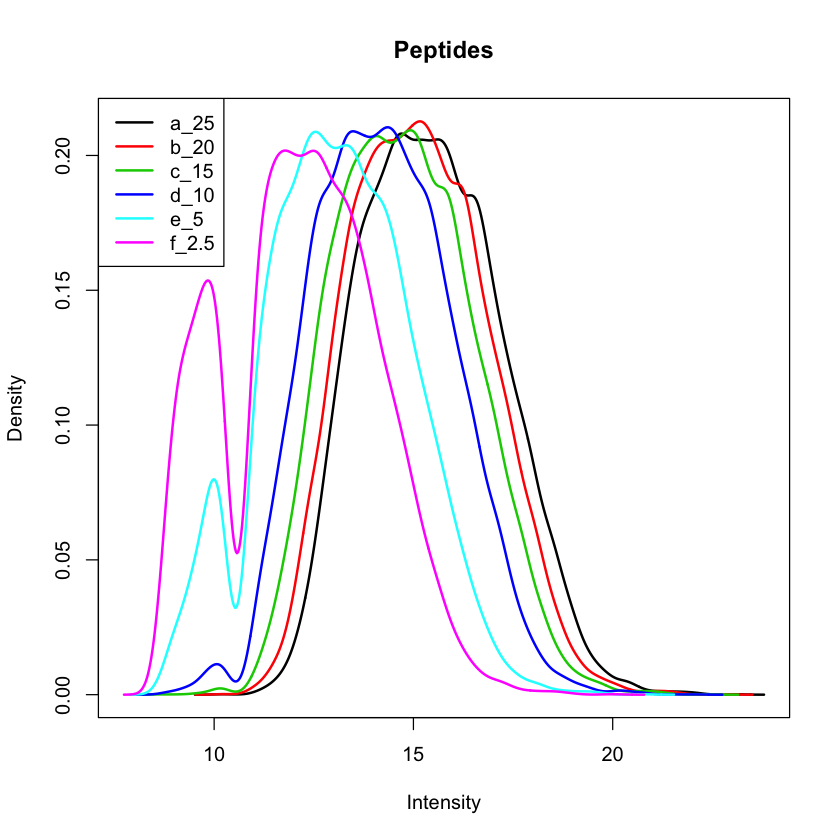

In [64]:
plotDensities(log2(peptides), main = "Peptides")

### The notch is still present, but reduced
The summation of multiple PSMs (in most cases) into peptides increases the magnitude of the intensities and reduces the relative effect of the notch.
### Finally, look at protein-level (log2) intensity distributions

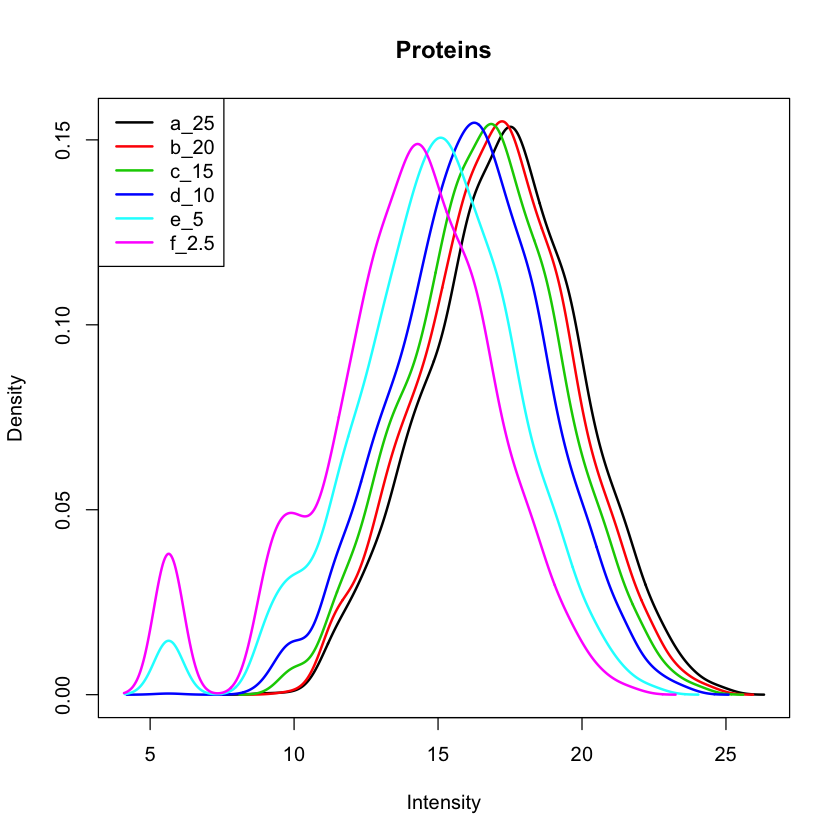

In [65]:
plotDensities(log2(proteins), main = "Proteins")

## The notch is mostly gone at the protein level
We required at least two peptides per protein, so most protein intensities are aggregated from several PSMs. This seems to average out the notch and the distributions look much better. The low bump in the proteins at log2 intensity of 6 or so is from the zero-replacement value of 50. We can see that the need for replacing missing data depends strongly on the amount of digest in the channel and is only occurring in the 2.5 and 5 dilution channels.

## Summarize the data in each column to get numerical values

In [66]:
# see what we have in the columns at each level of aggregation
print("PSMs:")
summary(psms)
print("Peptides:")
summary(peptides)
print("Proteins")
summary(proteins)

[1] "PSMs:"


      a_25              b_20              c_15              d_10        
 Min.   :    480   Min.   :    420   Min.   :    394   Min.   :    374  
 1st Qu.:  12889   1st Qu.:  10808   1st Qu.:   8129   1st Qu.:   5637  
 Median :  28060   Median :  23610   Median :  17821   Median :  12484  
 Mean   :  64110   Mean   :  51742   Mean   :  39585   Mean   :  27897  
 3rd Qu.:  68722   3rd Qu.:  57280   3rd Qu.:  43310   3rd Qu.:  30486  
 Max.   :8232300   Max.   :6013516   Max.   :4883029   Max.   :3367887  
      e_5                f_2.5         
 Min.   :    368.3   Min.   :   181.6  
 1st Qu.:   2602.9   1st Qu.:   997.0  
 Median :   5714.6   Median :  3240.7  
 Mean   :  13049.0   Mean   :  7285.8  
 3rd Qu.:  14125.9   3rd Qu.:  8005.3  
 Max.   :1609297.0   Max.   :952994.1  

[1] "Peptides:"


      a_25              b_20              c_15              d_10        
 Min.   :   1136   Min.   :   1136   Min.   :    394   Min.   :    414  
 1st Qu.:  18405   1st Qu.:  14994   1st Qu.:  11402   1st Qu.:   7966  
 Median :  43046   Median :  34746   Median :  26572   Median :  18561  
 Mean   :  96433   Mean   :  75380   Mean   :  58299   Mean   :  40314  
 3rd Qu.: 103832   3rd Qu.:  82494   3rd Qu.:  63304   3rd Qu.:  43988  
 Max.   :9408524   Max.   :7725898   Max.   :6005935   Max.   :4554710  
      e_5                f_2.5          
 Min.   :    375.3   Min.   :    345.4  
 1st Qu.:   3662.5   1st Qu.:   1992.6  
 Median :   8720.2   Median :   4834.9  
 Mean   :  19434.0   Mean   :  10792.2  
 3rd Qu.:  21163.7   3rd Qu.:  11856.7  
 Max.   :1911698.0   Max.   :1122813.6  

[1] "Proteins"


      a_25               b_20               c_15               d_10         
 Min.   :     512   Min.   :     827   Min.   :     748   Min.   :      50  
 1st Qu.:   47859   1st Qu.:   39068   1st Qu.:   29532   1st Qu.:   20997  
 Median :  166517   Median :  137186   Median :  103738   Median :   72158  
 Mean   :  746120   Mean   :  583940   Mean   :  451320   Mean   :  312161  
 3rd Qu.:  573798   3rd Qu.:  456530   3rd Qu.:  349698   3rd Qu.:  241573  
 Max.   :30487165   Max.   :23870707   Max.   :18641957   Max.   :12991318  
      e_5              f_2.5        
 Min.   :     50   Min.   :     50  
 1st Qu.:   9015   1st Qu.:   4778  
 Median :  32801   Median :  18037  
 Mean   : 149827   Mean   :  82819  
 3rd Qu.: 114691   3rd Qu.:  63668  
 Max.   :6002579   Max.   :3401632  

## Prepare the data for plotting
We will use the average of the 6 intensities as the x-axis and plot each dilution series (the different reporter ion channels) against that. We will use different colors for each dilution series channel and overlay 6 scatter plots in one figure. We will show the scatter plots with linear axis scales, so we can see the details. We will add a linear fit line for each series.

In [67]:
# create an average vector for the x-axis
psms$ref <- rowMeans(psms)
peptides$ref <- rowMeans(peptides)
proteins$ref <- rowMeans(proteins)

# we can simplify plotting if we put data in long form (tidy data)
gpsms <- gather(psms, key = dilution, value = intensity, a_25:f_2.5)
gpeptides <- gather(peptides, key = dilution, value = intensity, a_25:f_2.5)
gproteins <- gather(proteins, key = dilution, value = intensity, a_25:f_2.5)

# check some things
head(gproteins)

ref,dilution,intensity
94285.463,a_25,188305.8
50322.493,a_25,106780.4
6875.984,a_25,13065.7
86251.341,a_25,160570.5
532073.475,a_25,1044356.3
1297868.915,a_25,2533375.2


### Same thing with some transformations for MA plots
We will also make data frames for MA style plots. Those plots have transformed axes (log2 ratios on y-axis, and log10 average intensity on x-axis). We will do the average intensity in log10 scale (that is easier to mentally "unlog" to get back intensities). We will do the ratios in log2 scale since that is easier for estimating fold changes. 

In [68]:
# make frames for MA style plots
log_psms <- log2(psms[1:6] / psms$ref)
log_psms$ref <- log10(psms$ref)
log_peptides <- log2(peptides[1:6] / peptides$ref)
log_peptides$ref <- log10(peptides$ref)
log_proteins <- log2(proteins[1:6] / proteins$ref)
log_proteins$ref <- log10(proteins$ref)

# also tidy the log data frames
glog_psms <- gather(log_psms, key = dilution, value = log_ratios, a_25:f_2.5)
glog_peptides <- gather(log_peptides, key = dilution, value = log_ratios, a_25:f_2.5)
glog_proteins <- gather(log_proteins, key = dilution, value = log_ratios, a_25:f_2.5)

# compute the ratios of each dilution channel to the reference
# save as log values for horizontal lines in the MA plots
calc_ratios <- colMeans(psms)
calc_ratios <- log2(calc_ratios[1:6] / calc_ratios[7])

# check some things
round(calc_ratios, 2)

a_25  b_20  c_15  d_10   e_5 f_2.5 
 0.92  0.61  0.22 -0.28 -1.38 -2.22

## Look at the PSMs first
We have not done any filtering for the PSMs other than removing zeros. They are the raw peak heights. There will be duplicates of the same peptides. There will also be signals from contaminants and decoys.

Warning message:
“Removed 1277 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1277 rows containing missing values (geom_point).”Warning message:
“Removed 52 rows containing missing values (geom_smooth).”

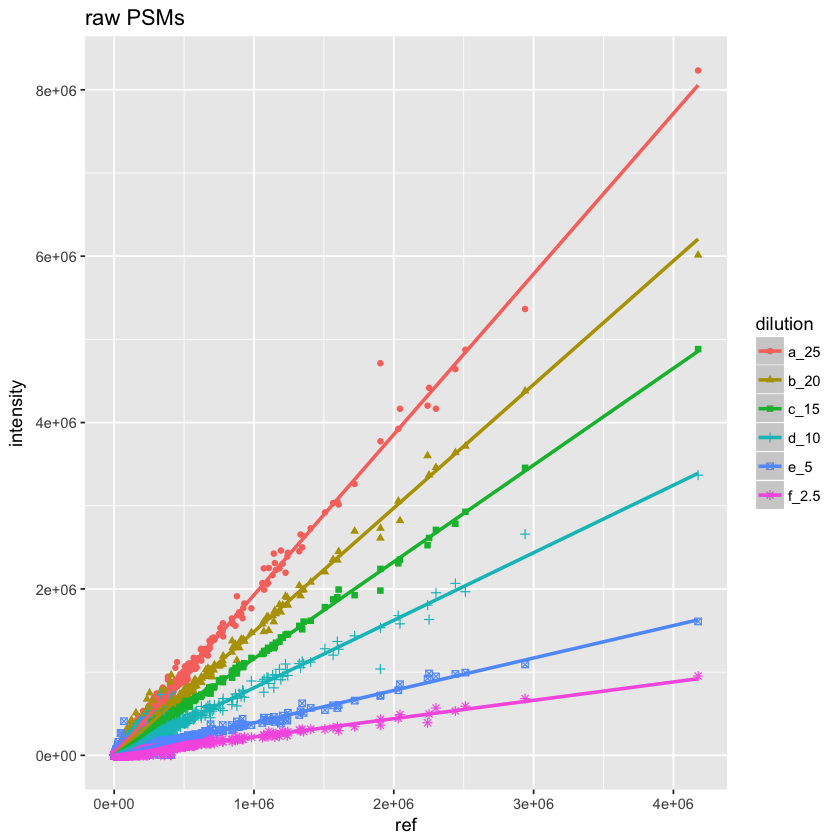

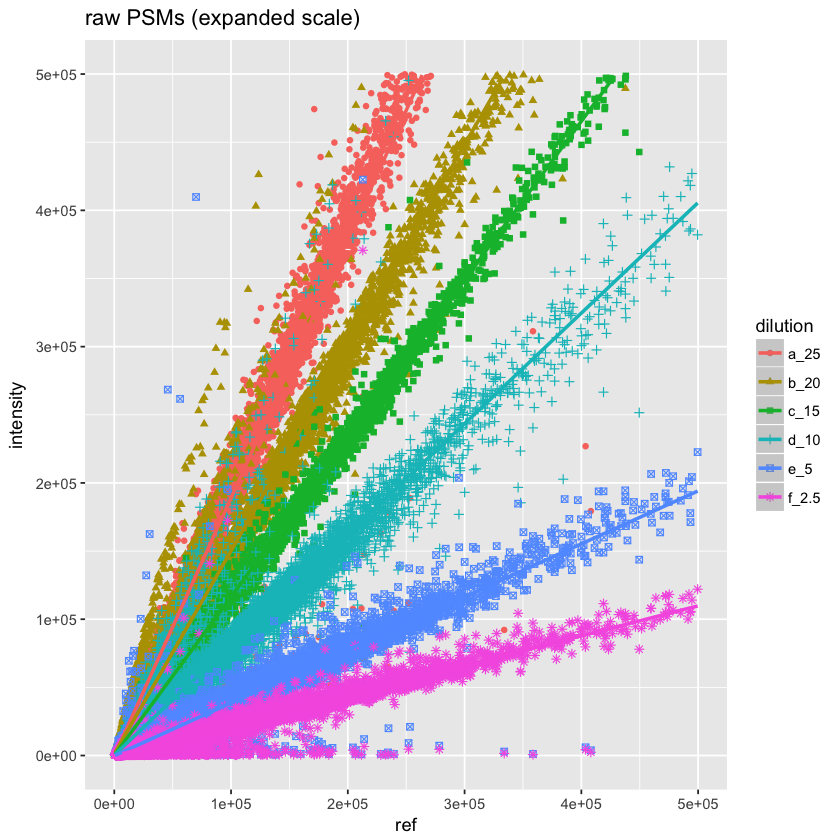

In [69]:
# full scale, linear axes
ggplot(data = gpsms, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) +
  geom_smooth(aes(color = dilution), method = "lm") +
  ggtitle("raw PSMs")

# expanded scale
ggplot(data = gpsms, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  xlim(c(0, 500000)) + ylim(c(0, 500000)) +
  ggtitle("raw PSMs (expanded scale)")

### The PSM data from different dilutions are separated
The different dilution series are fairly well separated by intensities. The separation is better for more intense PSMs and the scatter in the data increases as the intensities gets smaller towards the origin. 
## Peptides next
These have been filtered a bit more than the PSMs were. The peptides are aggregated from just the 1% FDR PSMs. Matches to contaminants and decoy have been removed. We have done parsimonious protein inference and an additional protein grouping step. Shared and unique peptide status were determined from the final list of reported proteins. Any shared peptides have been excluded. These are only the peptides associated with the confidently identified and quantifiable proteins. 

Warning message:
“Removed 1259 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1259 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing missing values (geom_smooth).”

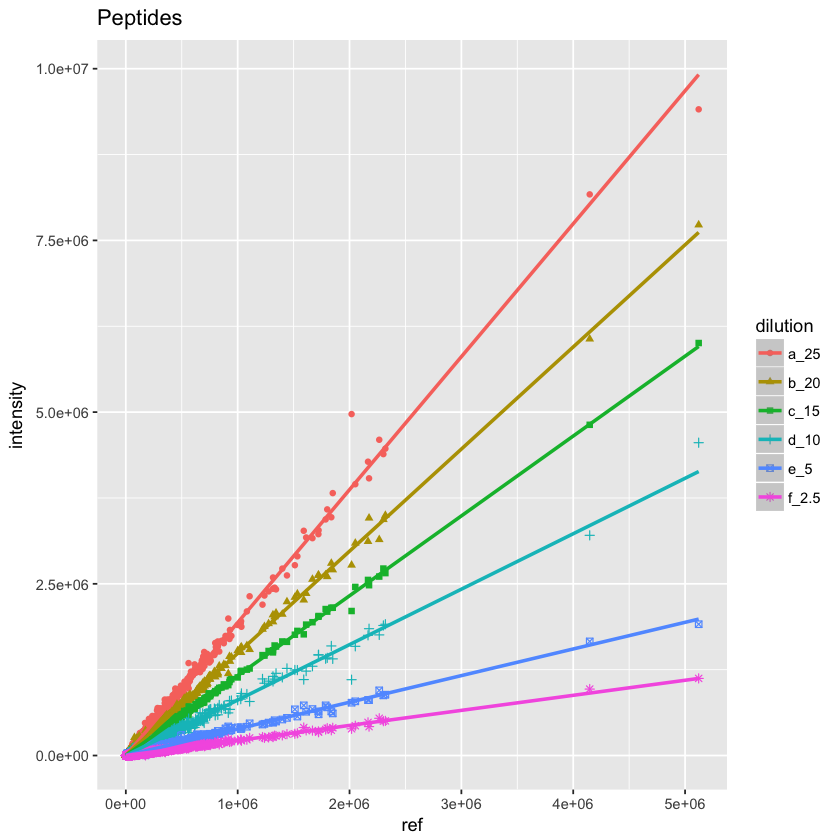

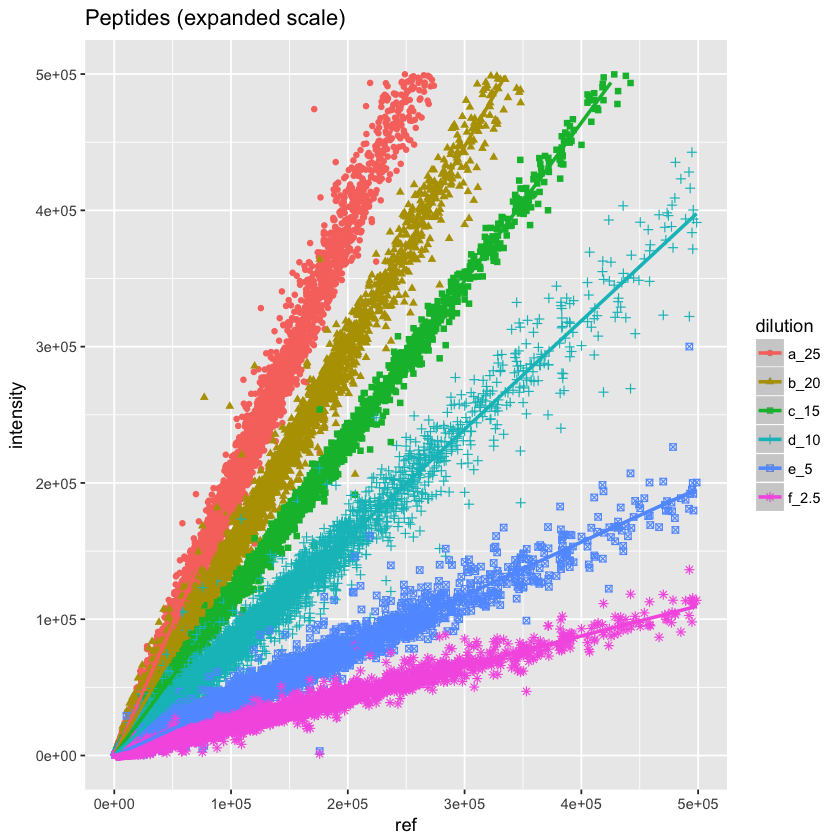

In [70]:
ggplot(data = gpeptides, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  ggtitle("Peptides")

# expanded scale
ggplot(data = gpeptides, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  xlim(c(0, 500000)) + ylim(c(0, 500000)) +
  ggtitle("Peptides (expanded scale)")

### Peptides have a little less scatter about the trend lines
Peptides look better than raw PSMs. We would have to do a little more work and select just the PSMs associated with these peptides to tease apart whether it was the filtering of the peptides or the aggregation of PSMs up to peptides that is making the peptide data look better than the PSM data. From the numbers at the top of the notebook, there are 60K PSMs that reduce to 20K peptides - about a 3-fold reduction.

## Finally, the proteins
Like the peptides, any contaminants and decoy proteins have been excluded. The protein totals only include unique peptides. Zero values were replaced by a value of 50. The PAW pipeline has a few places where replacement of zero intensities could happen. I have finally come to the conclusion that the best place to do that (if at all) is at the final protein intensity level. There is quite a lot (8-fold) of aggregation when going from peptides (20K) to proteins (2.7K).

Warning message:
“Removed 1745 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1745 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_smooth).”

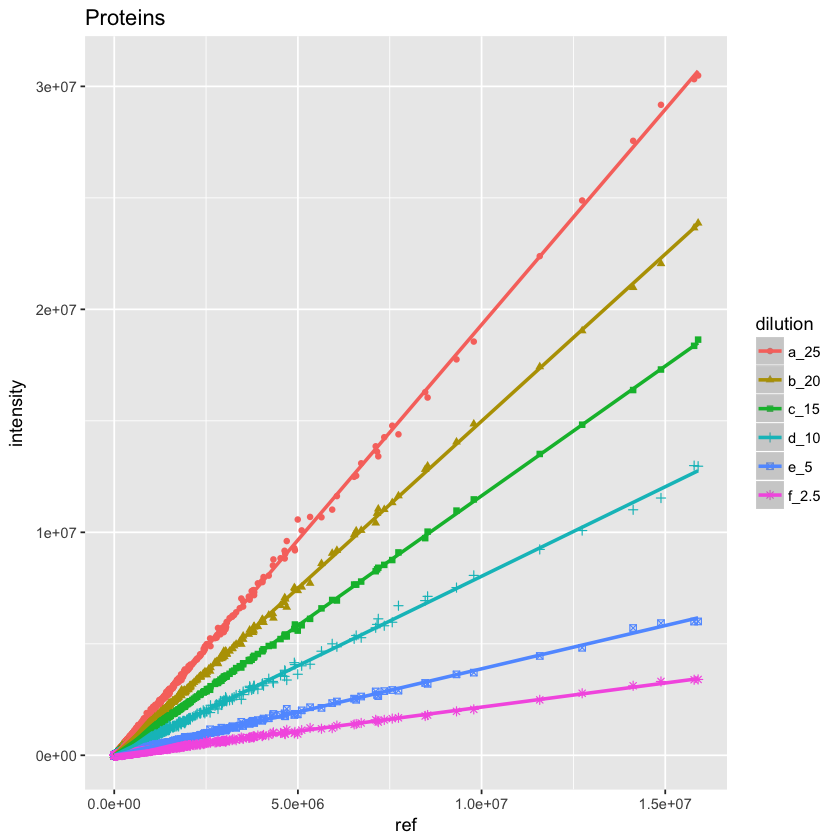

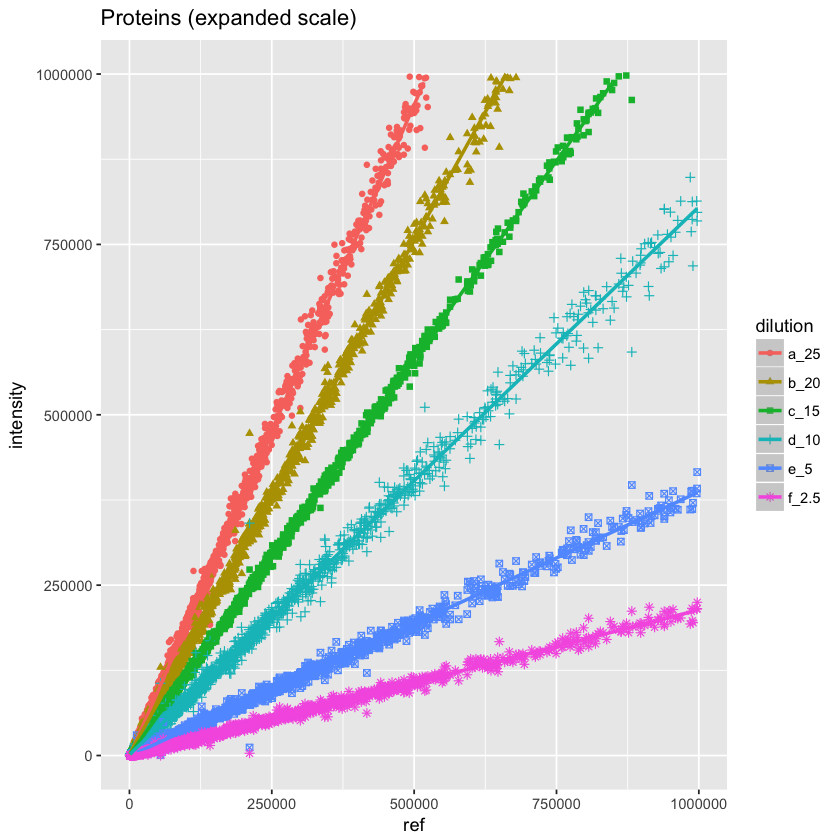

In [71]:
ggplot(data = gproteins, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  ggtitle("Proteins")

# expanded scale
ggplot(data = gproteins, aes(x = ref, y = intensity)) +
  geom_point(aes(color = dilution, shape = dilution)) + 
  geom_smooth(aes(color = dilution), method = "lm") +
  xlim(c(0, 1000000)) + ylim(c(0, 1000000)) +
  ggtitle("Proteins (expanded scale)")

## Proteins are much tighter to the trend lines
The aggregation of PSMs and peptides to protein total intensities has a pretty dramatic improvement on the consistency of the data (how close the proteins are to the trend lines) over the full dynamic range. We might expect some increased scatter at low protein intensities as the number of data values being combined into the protein totals goes down. We will do some calculations to see how much tighter the data become as a function of aggregations level below after we take a little detour into TMM normalization (part of the edgeR R package).

## MA plots will stack vertically by ratio to reference
MA plots are fold change on the y-axis (typically log2 of expression ratios) and a log10 average intensity on the x-axis. We have the average intensity as the reference column. The log10 of that will be our x-axis values. The ratio of each dilution series to the reference will be the y-axis (as log2 of the ratio). Each dilution series should be a horizontal line located at the expected ratio. The dilution series should stack vertically. 

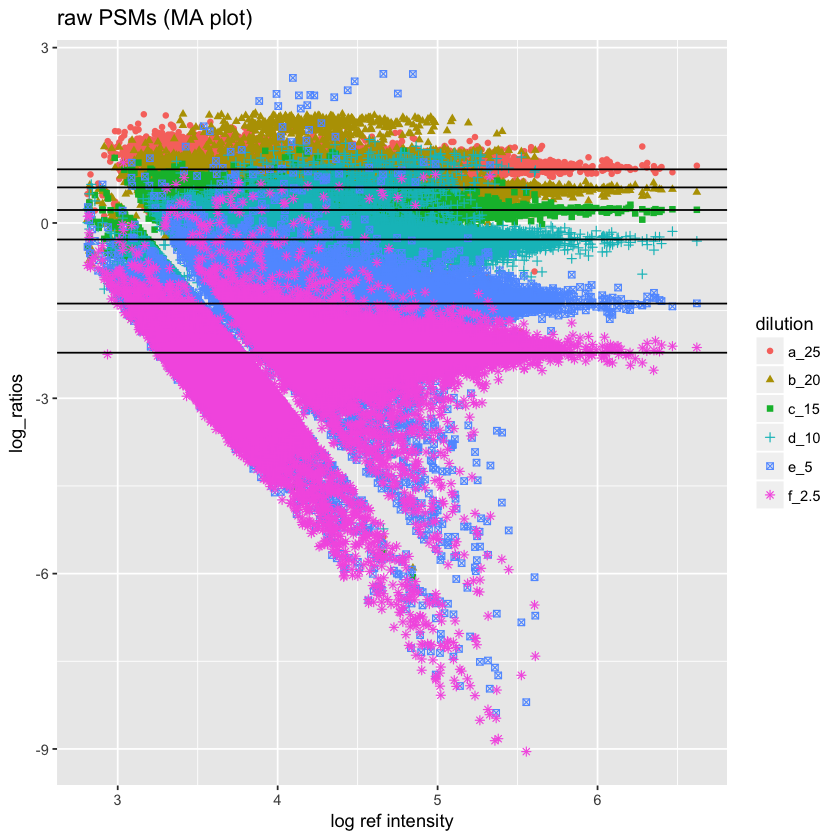

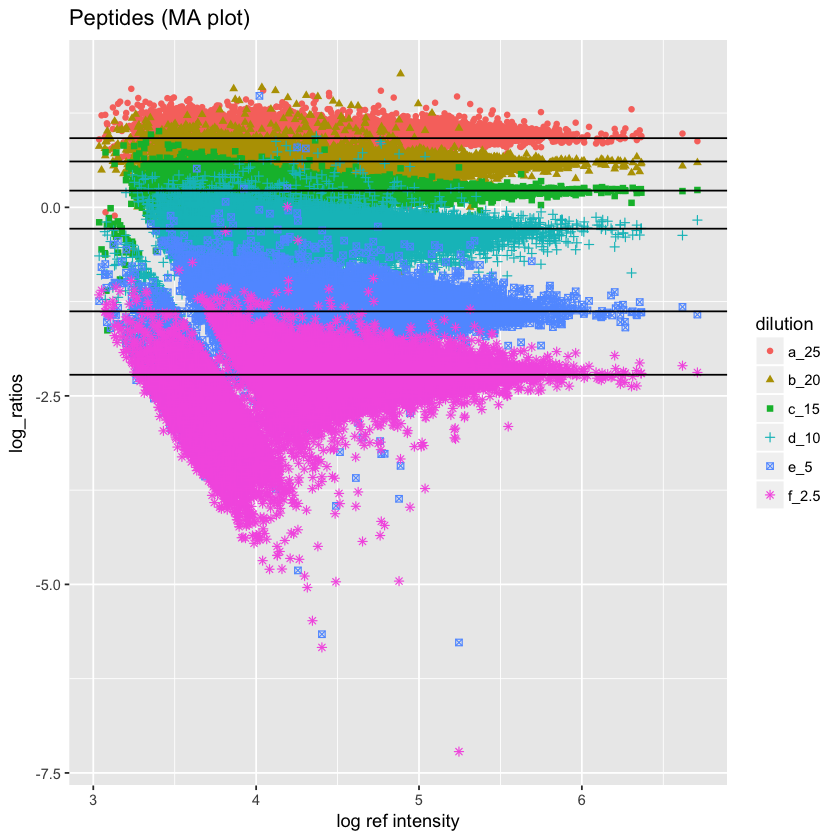

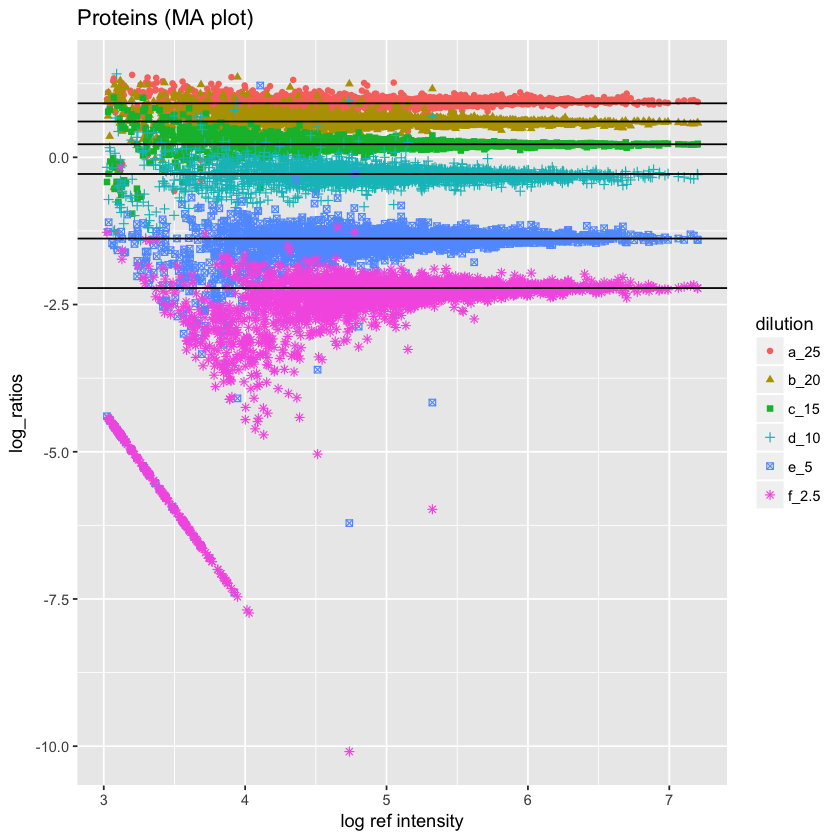

In [72]:
# MA style plot for PSMs
ggplot(data = glog_psms, aes(x = ref, y = log_ratios)) +
  geom_point(aes(color = dilution, shape = dilution)) +
  geom_hline(yintercept = calc_ratios) +
  xlab("log ref intensity") + ggtitle("raw PSMs (MA plot)")

# MA style plot for peptides
ggplot(data = glog_peptides, aes(x = ref, y = log_ratios)) +
  geom_point(aes(color = dilution, shape = dilution)) +
  geom_hline(yintercept = calc_ratios) +
  xlab("log ref intensity") + ggtitle("Peptides (MA plot)")

# MA style plot for proteins
ggplot(data = glog_proteins, aes(x = ref, y = log_ratios)) +
  geom_point(aes(color = dilution, shape = dilution)) +
  geom_hline(yintercept = calc_ratios) +
  xlab("log ref intensity") + ggtitle("Proteins (MA plot)")

## MA plots are also much better for proteins
The log scales on the MA plots make it easier to see how the "notch" artifact manifests itself. It is most visible in the PSMs plot. Each level of aggregation has reduced scatter and better separation between the different dilutions. The lower left diagonal in the proteins plot are the zero replacement values that are mostly associated with the 2.5 and 5 series. Note that the fold changes between the upper series (25, 20, and 15) are rather small.

The log scales and vertical separation by relative expression level let us see what is going on at lower abundances more clearly than the fan-like scatter plots. Weak reporter ion signals have more asymmetry in their scatter about the horizontal lines. We see this mostly for the 5 and 2.5 series data. Less diluted samples have increasing variance at low intensity, but do not seem to have as much asymmetry in the scatter. 

These distortions are partly due to the nature of the dilution experiment (I think). In more typical experiments, the reporter ion signals tend to be more similar across the channels. The combined signal of the peptide has to be strong enough to trigger a successful MS2 identification. Adding common sense protein inference rules like two peptides per protein helps ensure that the weakest protein signals are a little larger and less likely to have as much low signal distortion. Here, the channels with more sample drive the MS2 identifications and we see the 2.5 dilution series all the way down to the limits of detection. Some high dynamic range samples, like plasma or serum, may have larger numbers of very low abundance proteins, and the behavior of very low intensity reporter ions may be more important. 

# 2. Aside 
## Exploring normalizations in edgeR
The data above shows that there is less scatter in the data around the trend lines for proteins compared to peptides or PSMs. How can we quantify that? We expect each protein's relative abundances to mirror the dilution factor. We could compute vectors of ratios for each dilution series and see how "tight" the distributions are using something like the interquartile range. However, that would give us 6 distributions to look at. We are not really interested in accuracy for this question, so we do not care if the ratios are what we expect. We would probably need to worry about isotopic correction factors in adjacent channels to really get the best accuracy anyway.

If we normalize the data, we can get the 6 samples on a similar scale and then compute the CV for each row (either individual PSMs, peptides, or proteins) and look at the distribution of CV values. Lowest median CV wins this competition. 

We have many options for normalizing. We can use the known dilution factors to "undo" the pipetting differences. We can also fire up edgeR and use its internal normalization algorithms. This is interesting to explore because the normalization factors in edgeR can seem rather confusing.

The first confusion in edgeR is that there are really **two** coupled normalization factors rather than just one. After loading data into a DGEList object in edgeR, you can examine the object. This is a "list" object in R, a heterogeneous data container. The table of data values (counts for RNA-Seq or intensities for TMT) is a data frame ("\$counts") in the list. Another data frame is the "\$sample" information. This has sample names, group memberships (e.g. control or treatment), library sizes, and (potentially) TMM normalization factors.

In [73]:
# load edgeR and then put data into DGEList objects
library(edgeR)
y_psms  <- DGEList(counts = psms[1:6], group = factor(labels))
y_peptides  <- DGEList(counts = peptides[1:6], group = factor(labels))
y_proteins  <- DGEList(counts = proteins[1:6], group = factor(labels))
y_psms$samples
# y_peptides$samples
# y_proteins$samples

,group,lib.size,norm.factors
a_25,a_25,3827241213,1
b_20,b_20,3088914690,1
c_15,c_15,2363152704,1
d_10,d_10,1665392787,1
e_5,e_5,778998204,1
f_2.5,f_2.5,434946648,1


## lib.size column is important 
Data is adjusted by library size in edgeR. What does that mean? It means that each column is going to be divided by the library size (the column sum) in many contexts. edgeR has a "cpm" function that puts the data on a counts-per-million scale. For fun, let's do some manipulations of the psm data:

In [74]:
# these are the original column sums (they will match the library sizes)
round(colSums(psms), 0)

a_25       b_20       c_15       d_10        e_5      f_2.5        ref 
3827241213 3088914690 2363152704 1665392787  778998204  434946648 2026441041

In [75]:
# dividing by library sizes makes each sample sum to 1.0
colSums(sweep(psms[1:6], 2, y_psms$samples$lib.size, FUN = "/"))

a_25  b_20  c_15  d_10   e_5 f_2.5 
    1     1     1     1     1     1

In [76]:
# transforming to the CPM scales makes each column sum to one million
colSums(cpm(y_psms))
sum(colSums(cpm(y_psms)))

a_25  b_20  c_15  d_10   e_5 f_2.5 
1e+06 1e+06 1e+06 1e+06 1e+06 1e+06

[1] 6e+06

## The library size scales each sample to unity
We see that the library sizes are just the column sums of the original data. If we divide each row by the library sum (the column total) we will make each sample sum up to 1.0. The "cpm" function divides each column by its library size (makes them 1.0) then multiples the column by one million.

We can run the trimmed mean of M-values algorithm and look at the "normalization" factors.

> Robinson, M.D. and Oshlack, A., 2010. A scaling normalization method for differential expression analysis of RNA-seq data. Genome biology, 11(3), p.R25.

Then we can re-run the "cpm" function after the TMM step and see if the result is the same as above.

In [77]:
# compute TMM factors - they get added to $samples
y_psms_2 <- calcNormFactors(y_psms)
round(y_psms_2$samples$norm.factors, 6)

[1] 1.014546 1.008467 1.011007 0.998596 0.994266 0.973688

In [78]:
# see what column sums we get after a cpm function call now that there are TMM factors
round(colSums(cpm(y_psms_2)), 0)
round(sum(colSums(cpm(y_psms_2))), 0)

a_25    b_20    c_15    d_10     e_5   f_2.5 
 985662  991604  989113 1001406 1005767 1027023

[1] 6000575

## norm.factors are not what we might have guessed
The libraries are very different in size (due to the sample dilutions), yet the "norm.factors" are all close to 1.0. This is because the TMM factors are in **addition** to the library size scaling. The way the "norm.factors" work is to adjust the effective library sizes. If the "lib.size" values are multiplied by the "norm.factors", then the column divided by the effective library size, you get the TMM normalized result.

If we call the "cpm" function after we have done the TMM normalization, we no longer get one million for each column total. Some column totals are a bit more and some are a bit less than 1 million. The grand total is still basically 6 million (within rounding errors).

We can compute the normalization factors by hand (below) and make our own cpm data frame. We should get the same column totals as above.   

In [79]:
# combine the library sizes and TMM factors to see what we get
real_factors <- 1 / (y_psms_2$samples$lib.size * y_psms_2$samples$norm.factors)
by_hand_cpm <- 1000000 * sweep(psms[1:6], 2, real_factors, FUN = "*")
round(colSums(by_hand_cpm), 0)

a_25    b_20    c_15    d_10     e_5   f_2.5 
 985662  991604  989113 1001406 1005767 1027023

### edgeR does two normalization steps and keeps the factors separate
We see that edgeR always does a library size normalization step. The **optional** trimmed mean of M values normalization is addition to the library size normalization and the TMM factors are the **extra** factors in addition to the library size factors. The TMM factors scale the library sizes, which are in the denominators, so you have to divide, not multiple, by the TMM factors.

# 3. Quantify the differences between PSM, peptide, and protein intensities
## Based on the dilution factors, scale the data to a common scale and compute CVs for PSMs, peptides, and proteins
We know the expected dilution factors and could adjust by those. We can also take the column totals and adjust by the ratio of those. The later was done to put all 6 channels on a similar scale, and the coefficients of variance (CVs) were computed. We will print out the distribution summaries and compare boxplots.

In [80]:
# define a function for scaling data and computing CVs
compute_cv <- function(temp) {
#  middle <- c(25, 20, 15, 10, 5, 2.5) # the "known" fators
  middle <- c(22.26, 17.60, 13.56, 9.43, 4.50, 2.50) # the measured factors
  average <- mean(middle)
  temp[1] <- temp[1] * average/middle[1]
  temp[2] <- temp[2] * average/middle[2]
  temp[3] <- temp[3] * average/middle[3]
  temp[4] <- temp[4] * average/middle[4]
  temp[5] <- temp[5] * average/middle[5]
  temp[6] <- temp[6] * average/middle[6]
  cv <- 100 * apply(temp, 1, sd) / rowMeans(temp)
}

# compute the CVs and look at the distribution summary numbers
summary(compute_cv(psms[1:6]))
summary(compute_cv(peptides[1:6]))
summary(compute_cv(proteins[1:6]))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.6485   8.0906  13.5932  18.0421  23.7901 241.4417 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.924   6.961  11.087  14.194  19.117 164.100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.444   3.613   6.467  12.097  13.295 143.706 

## We can also use the factors from edgeR to scale the data
We will print out the same distribution summary numbers as above and see that they are very similar. We will also see how the adjusted samples cluster in an MDS plot. The 4 higher dilution series are tightly clustered together and the two weaker channels show some differences, probably due to the low abundance proteins that bump up against the limit of detection in the 5 and 2.5 series.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.7889   8.2452  13.8668  18.0959  23.6169 241.4582 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.8534   6.9314  11.2061  14.1965  19.2097 165.1362 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.3535   3.7404   6.4626  11.9724  12.7305 145.1389 

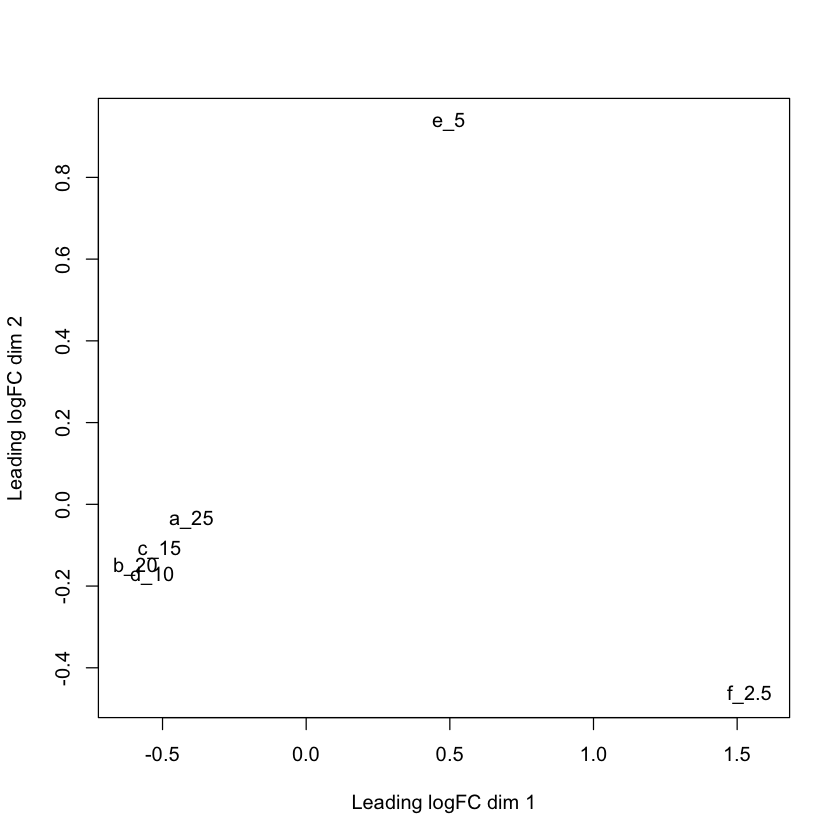

In [81]:
# we can also let edgeR scale the data for us
# combine the library size and TMM factors (i.e. normalize the data)
y_psms_norm <- calcNormFactors(y_psms)
y_peptides_norm <- calcNormFactors(y_peptides)
y_proteins_norm <- calcNormFactors(y_proteins)

# we can compute the CVs on the cpm function returned objects
cv_psms <- 100 * apply(cpm(y_psms_norm), 1, sd) / rowMeans(cpm(y_psms_norm))
cv_peptides <- 100 * apply(cpm(y_peptides_norm), 1, sd) / rowMeans(cpm(y_peptides_norm))
cv_proteins <- 100 * apply(cpm(y_proteins_norm), 1, sd) / rowMeans(cpm(y_proteins_norm))

# check the distribution summary numbers
summary(cv_psms)
summary(cv_peptides)
summary(cv_proteins)

# see if we have made the dilution series more "the same"
plotMDS(y_proteins_norm)

## Look at the distributions of CV values at each level
These are the values from the above function not the edgeR values. The plot labels show the median CV values. There are some differences between the median and mean CVs because the distributions are not symmetric. They tail on the larger CV side. 

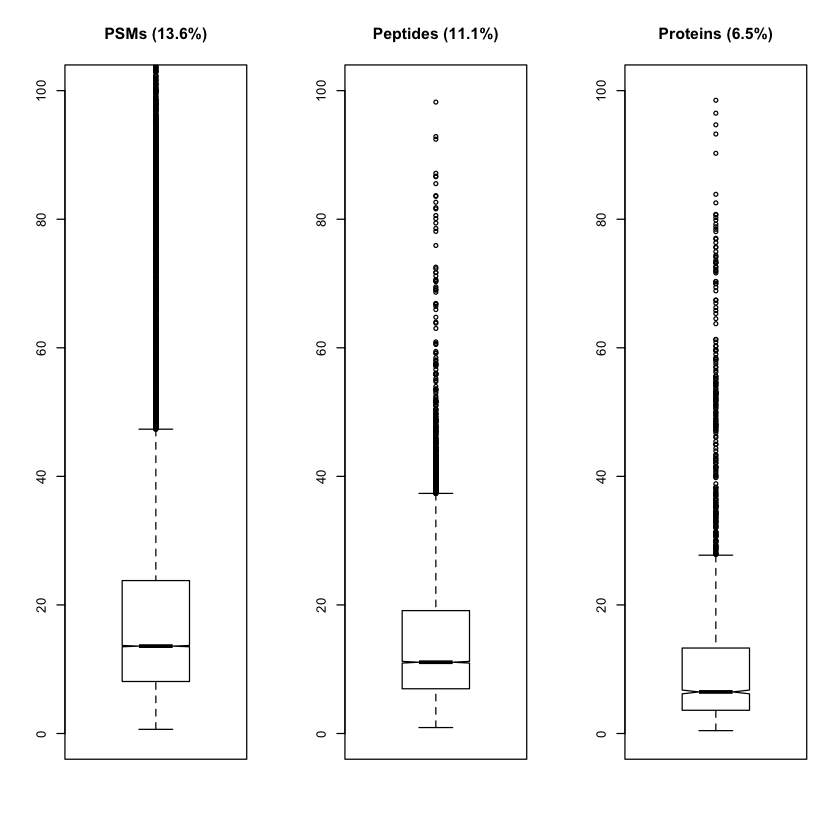

In [82]:
# compare some box plots of the CV distributions
par(mfrow = c(1, 3))
boxplot(compute_cv(psms[1:6]), notch = TRUE, ylim = c(0, 100), main = "PSMs (13.6%)")
boxplot(compute_cv(peptides[1:6]), notch = TRUE, ylim = c(0, 100), main = "Peptides (11.1%)")
boxplot(compute_cv(proteins[1:6]), notch = TRUE, ylim = c(0, 100), main = "Proteins (6.5%)")
par(mfrow = c(1, 1))

# Conclusions
Protein intensities have smaller variances (tighter scatter plots and smaller median CVs) and increased dynamic 
range compared to PSM or peptide level measures. There is also a dramatic reduction in the number of data 
points. Proteins are 22-fold fewer than PSMs and almost 8-fold fewer than peptides. Summing filtered PSM 
reporter ions into protein totals is a simple and effective way to aggregate TMT data. This was first described 
in the Compass paper from the Coon lab:

> Wenger, C.D., Phanstiel, D.H., Lee, M., Bailey, D.J. and Coon, J.J., 2011. COMPASS: A suite of pre‐and post‐search proteomics software tools for OMSSA. Proteomics, 11(6), pp.1064-1074.


In [83]:
# log the R session
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.5

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] edgeR_3.22.2    limma_3.36.1    forcats_0.3.0   stringr_1.3.1  
 [5] dplyr_0.7.5     purrr_0.2.4     readr_1.1.1     tidyr_0.8.1    
 [9] tibble_1.4.2    ggplot2_2.2.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3         locfit_1.5-9.1       tidyselect_0.2.4    
 [4] repr_0.15.0          reshape2_1.4.3       haven_1.1.1         
 [7] lattice_0.20-35      colorspace_1.3-2     htmltools_0.3.6     
[10] base64enc_0.1-3      rlang_0.2.0          pillar_